# Predicting Bike Rentals
Washington, D.C. communal bike rentals

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

bike_rentals = pd.read_csv("bike_rental_hour.csv")

bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


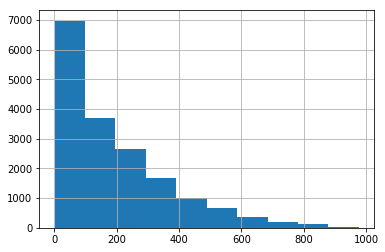

In [2]:
bike_rentals['cnt'].hist()

In [3]:
abs(bike_rentals.corr())['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

In [4]:
def assign_label(hr):
    if 6 <= hr < 12:
        return 1
    elif 12 <= hr < 18:
        return 2
    elif hr >= 18:
        return 3
    else:
        return 4

In [5]:
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

Using root_mean_squared_error as error metric.  This will penalizing predictions that are not close, while still returning the result in the same units as `cnt`

In [6]:
shuffle = np.random.permutation(bike_rentals.index)
shuffle_rentals = bike_rentals.loc[shuffle]

features = [col for col in bike_rentals.columns if col != 'cnt']

X_train, X_test, y_train, y_test = train_test_split(shuffle_rentals[features],shuffle_rentals['cnt'],test_size=0.2)

### Linear Regression

In [7]:
train_features = ['temp','hr','time_label','hum','yr','season']

In [8]:
lr = LinearRegression()
lr.fit(X_train[train_features],y_train)
predictions = lr.predict(X_test[train_features])
mse = mean_squared_error(y_test,predictions)
rmse = mse ** 0.5
print(rmse)

129.811947378


The root mean squared error is about 131, which is higher than expected.  Running the error metric on the training data, will determine overfitting or underfitting.  Since linear regression was used, it is most likely underfitting, so adding more features could improve the model.

In [9]:
predictions = lr.predict(X_train[train_features])
mse = mean_squared_error(y_train,predictions)
rmse = mse ** 0.5
print(rmse)

133.335950015


The root mean squared error is also high for the training data, indicating this model is underfitting.

In [10]:
train_features = ['temp','hr','time_label','hum','yr','season','weathersit','mnth','windspeed','holiday',
                  'workingday','weekday']

In [11]:
lr.fit(X_train[train_features],y_train)
predictions = lr.predict(X_test[train_features])
mse = mean_squared_error(y_test,predictions)
rmse = mse ** 0.5
print(rmse)

129.799870355


In [12]:
predictions = lr.predict(X_train[train_features])
mse = mean_squared_error(y_train,predictions)
rmse = mse ** 0.5
print(rmse)

132.956092633


Adding additional features did not improve the model much, other options for linear regression would be to try polynomial features as well.

### Decision Tree

In [13]:
train_features = ['temp','hr','time_label','hum','yr','season']

In [14]:
reg = DecisionTreeRegressor()
reg.fit(X_train[train_features],y_train)
predictions = reg.predict(X_test[train_features])
mse = mean_squared_error(y_test,predictions)
rmse = mse ** 0.5
print(rmse)

113.088014472


In [15]:
predictions = reg.predict(X_train[train_features])
mse = mean_squared_error(y_train,predictions)
rmse = mse ** 0.5
print(rmse)

34.2824264177


The default decision tree overfits the data, this can be helped by restricting some of the parameters.

In [16]:
reg = DecisionTreeRegressor(max_depth=10,min_samples_leaf=20)
reg.fit(X_train[train_features],y_train)
predictions = reg.predict(X_test[train_features])
mse = mean_squared_error(y_test,predictions)
rmse = mse ** 0.5
print(rmse)

91.7256854558


In [17]:
predictions = reg.predict(X_train[train_features])
mse = mean_squared_error(y_train,predictions)
rmse = mse ** 0.5
print(rmse)

86.4819598654


Using a Decision Tree Regressor, I was able to decrease the root mean squared error for both the test and training sets.  Restricting the max_depth and min_samples_leaf allowed this to occur, as the default Decision Tree greatly overfit the data.  This inidicates that this is a better model, that is not overfitting the data.  Adding features here may help reduce the error.

In [18]:
train_features = ['temp','hr','time_label','hum','yr','season','weathersit','mnth','windspeed','holiday',
                  'workingday','weekday']

In [19]:
reg = DecisionTreeRegressor(max_depth=10,min_samples_leaf=20)
reg.fit(X_train[train_features],y_train)
predictions = reg.predict(X_test[train_features])
mse = mean_squared_error(y_test,predictions)
rmse = mse ** 0.5
print(rmse)

61.3208450373


In [20]:
predictions = reg.predict(X_train[train_features])
mse = mean_squared_error(y_train,predictions)
rmse = mse ** 0.5
print(rmse)

56.8952350519


### Random Forest

In [21]:
train_features = ['temp','hr','time_label','hum','yr','season']

In [22]:
rf = RandomForestRegressor()
rf.fit(X_train[train_features],y_train)
predictions = rf.predict(X_test[train_features])
mse = mean_squared_error(y_test,predictions)
rmse = mse ** 0.5
print(rmse)

97.4620241796


In [23]:
predictions = rf.predict(X_train[train_features])
mse = mean_squared_error(y_train,predictions)
rmse = mse ** 0.5
print(rmse)

48.6792972815


The default Random Forest provides a good fit to the data, however it is still showing signs of overfitting.  Adjusting the parameters again should compensate for this.

In [24]:
rf = RandomForestRegressor(min_samples_leaf=10)
rf.fit(X_train[train_features],y_train)
predictions = rf.predict(X_test[train_features])
mse = mean_squared_error(y_test,predictions)
rmse = mse ** 0.5
print(rmse)

87.978127071


In [25]:
predictions = rf.predict(X_train[train_features])
mse = mean_squared_error(y_train,predictions)
rmse = mse ** 0.5
print(rmse)

79.2463840673


The Random Forest was able to generate the lowest error metric so far with the given features.  Adding more features will likely improve this even further.

In [26]:
train_features = ['temp','hr','time_label','hum','yr','season','weathersit','mnth','windspeed','holiday',
                  'workingday','weekday']

In [27]:
rf = RandomForestRegressor()
rf.fit(X_train[train_features],y_train)
predictions = rf.predict(X_test[train_features])
mse = mean_squared_error(y_test,predictions)
rmse = mse ** 0.5
print(rmse)

43.6880175516


In [28]:
predictions = rf.predict(X_train[train_features])
mse = mean_squared_error(y_train,predictions)
rmse = mse ** 0.5
print(rmse)

19.1988487888


In [29]:
rf = RandomForestRegressor(min_samples_split=5)
rf.fit(X_train[train_features],y_train)
predictions = rf.predict(X_test[train_features])
mse = mean_squared_error(y_test,predictions)
rmse = mse ** 0.5
print(rmse)

43.4515567152


In [30]:
predictions = rf.predict(X_train[train_features])
mse = mean_squared_error(y_train,predictions)
rmse = mse ** 0.5
print(rmse)

24.1618246457


Using the Random Forest with all the available features and some minor adjustments for overfitting provided the best model for this data set.